## Installing libraries

In [11]:
!pip install mplfinance
!pip install trendln --upgrade --no-cache-dir
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install ta
!pip install matplotlib
!pip install seaborn
!pip install googlenews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.9/288.9 KB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.1/289.1 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.5/339.5 KB 11.0 MB/s eta 0:00:00


## Import libreries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime as dt
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
from GoogleNews import GoogleNews
sns.set()
%matplotlib inline

from taAnalysis import taAnalysis
from performance import performance, corr
from fearGreed import fearGreed

## Setting parameters

In [3]:
asset = "BTC-USD"
keyword = "bitcoin"
# Range used to download datas. 
start = dt.date(2018, 10, 1)
end = dt.date.today()
# Range used to plot the chart.Support & resistance are identified by this range 
start_date_plot = dt.date(2021, 10, 1)
end_date_plot = dt.date.today()

## Technical analysis

[*********************100%***********************]  1 of 1 completed


/Users/valeriomellini/source-code/youtube/venv/lib/python3.8/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/valeriomellini/source-code/youtube/venv/lib/python3.8/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/Users/valeriomellini/source-code/youtube/venv/lib/python3.8/site-packages/ta/trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
/Users/valeriomellini/source-code/youtube/venv/lib/python3.8/site-packages/ta/trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_down = pd.Series(index=self._psar.ind

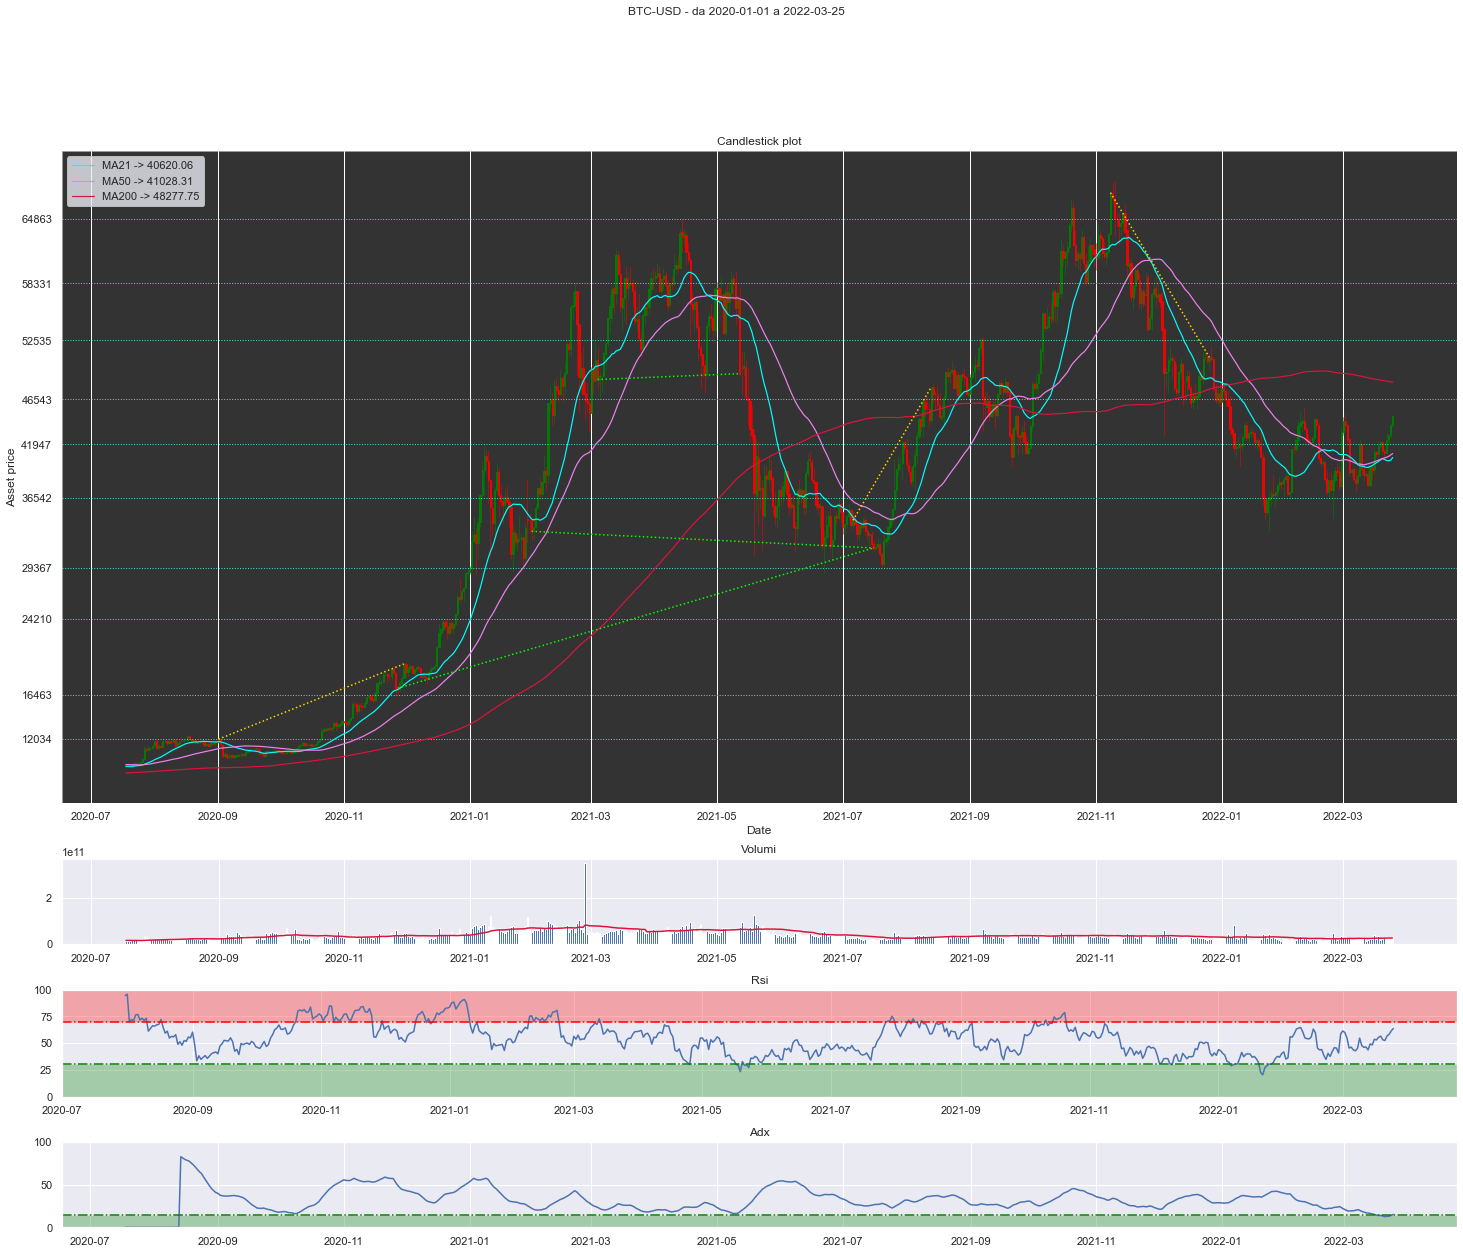

In [4]:
ta = taAnalysis("BTC-USD", "2020-01-01", "2020-01-01")
ta.download_data()
ta.set_levels()
df = ta.get_data()
fig = ta.plot_all()
fig.show()

## Btc perfomance & correlations

<AxesSubplot:title={'center':'BTC-USD current price compared to 356, 180, 90, 21, 7 days ago'}>

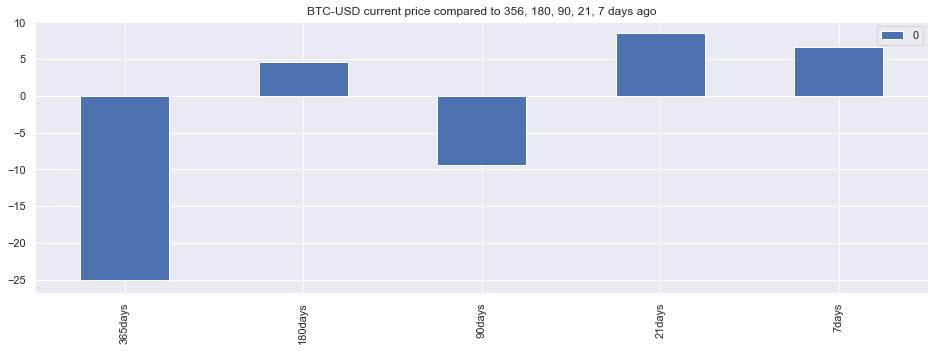

In [5]:
ris = performance(df)
ris.plot(kind='bar', 
         title='{0} current price compared to 356, 180, 90, 21, 7 days ago'.format(asset), 
         figsize=(16,5))

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Correlation between BTC S&P500'}>

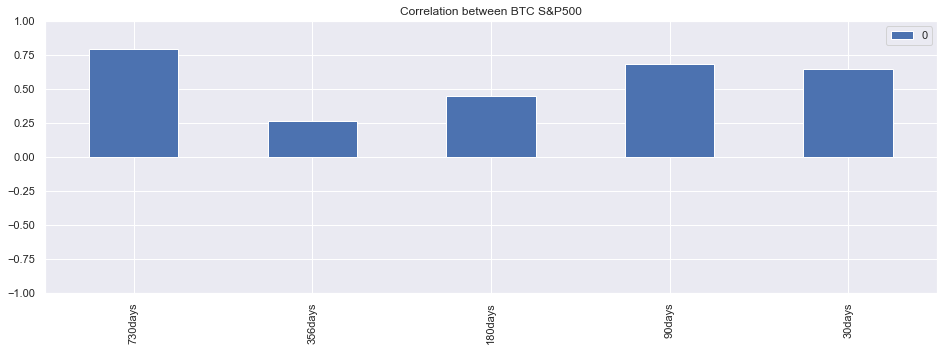

In [6]:
sp = yf.download('^GSPC', start=start, end=dt.date.today())
ris = corr(df, sp, [730, 356, 180, 90, 30])
ris.plot(kind='bar', 
         title='Correlation between BTC S&P500'.format(asset), 
         figsize=(16,5),
         ylim=([-1,1]))

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Correlation between BTC S&P500'}>

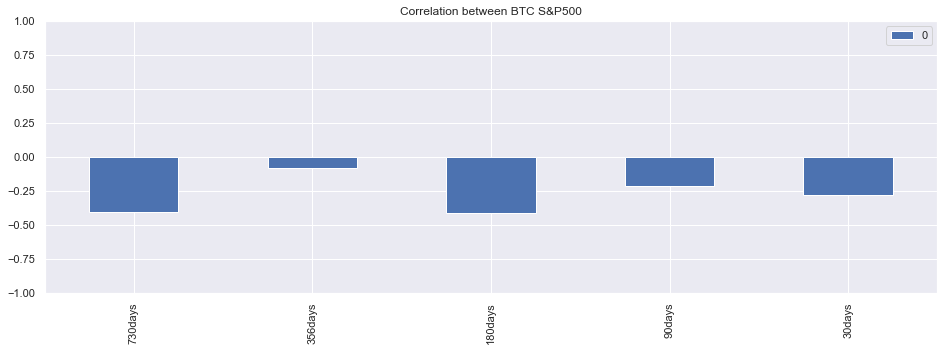

In [7]:
gold = yf.download('IAU', start=start, end=dt.date.today())
ris = corr(df, gold, [730, 356, 180, 90, 30])
ris.plot(kind='bar', 
         title='Correlation between BTC S&P500'.format(asset), 
         figsize=(16,5),
         ylim=([-1,1]))

## Fears & Greed

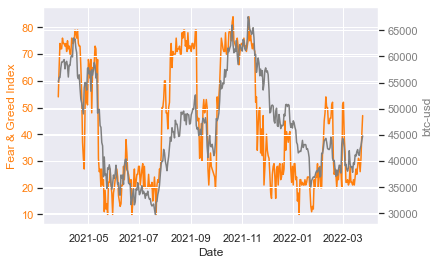

<Figure size 1152x504 with 0 Axes>

In [9]:
fng = fearGreed()
fng.downloadData(limit=365)
fng.plot_all(df)

## Analysis on chain 
To use this shell you'll need an API key from [Glassnode](https://glassnode.com/)

In [ ]:
with open("settings.json", 'r') as j:
    skey=json.load(j)["glsnd_secretkey"]

## BTC news

In [24]:
googlenews = GoogleNews()
googlenews = GoogleNews(lang='en', region='US')
googlenews = GoogleNews(period='7d')
googlenews.search(keyword)
googlenews.get_page(10)
res = googlenews.results()
for i in res:
    print('**** {0} ****\n'.format(i['title']))
    print('{0}\n'.format(i['desc']))
    print('{0}\n'.format(i['link']))
    print('{0}\n'.format(i['date']))
    print('------------------------------------------\n\n')

---- Malaysian Minister Rules Out Possibility of Bitcoin as Legal Tender ----

Malaysia's deputy finance minister said cryptocurrencies are not suitable 
for use in payments. Earlier this week another minister called for the 
government...

https://www.regulationasia.com/malaysian-minister-rules-out-possibility-of-bitcoin-as-legal-tender/

9 mins ago

-------


---- Wolf BTC, a new smart and secure crypto asset that reward it's holders in Bitcoin. ----

Ankara, Turkey, March 25, 2022 (GLOBE NEWSWIRE) -- Wolf BTC, A smart and 
secure crypto asset that designed from scratch by a group of 
cryptocurrency...

https://www.globenewswire.com/news-release/2022/03/25/2410241/0/en/Wolf-BTC-a-new-smart-and-secure-crypto-asset-that-reward-it-s-holders-in-Bitcoin.html

4 mins ago

-------


---- What are the BTC price levels to watch as Bitcoin nears March peak? ----

BTC price action stays bullish with $46000 next on the menu for Bitcoin 
traders.

https://cointelegraph.com/news/what-are-the-btc-p